In [6]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(["/home/mathia/PycharmProjects/neslearn-git/"])

Python 3.4.2 (default, Oct  8 2014, 10:45:20) 
[GCC 4.9.1] on linux


In [2]:
%load_ext autoreload

In [3]:
%matplotlib inline

In [3]:
%autoreload

In [9]:
import pandas
from hsa.ba.analyse_ram import ram_from_movie
import importlib
import hsa.tree_search.heuristics as heuristics

In [5]:
without_shortcut = pandas.DataFrame.from_records(ram_from_movie("../../movies/5_1-1_without-shortcut.fm2"))

In [71]:
with_shortcut = pandas.DataFrame.from_records(ram_from_movie("../../movies/6_1-1_with_shortcut.fm2"))

In [72]:
with_shortcut =  with_shortcut[300:]

In [106]:
def x_pos(ram):
    coarse_x = ram[0x006D]
    current_fine = ram[0x0086]
    return coarse_x * 256 + current_fine
    # return current_fine

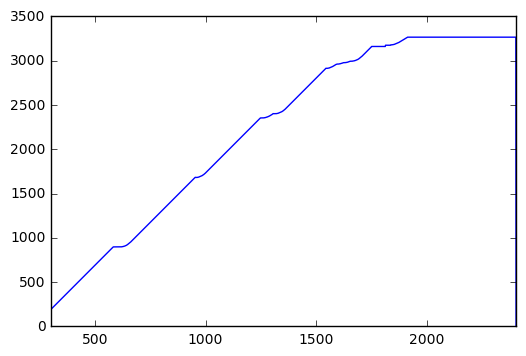

In [107]:
without_shortcut.apply(x_pos,axis=1)[300:].plot()

In [125]:
def shortcut_bonus(ram):
    coarse_x = ram[0x006D]
    whatever = ram[0x071B] #Next screen (in level) 
    level_layout = ram[0x072C]
    if whatever == 0 and coarse_x == 0 and not level_layout == 10:
        return 9*256
    if whatever == 10 and coarse_x == 0:
        return 10*256
    return 0    

In [126]:
def combined(ram):
    return x_pos(ram) + shortcut_bonus(ram)

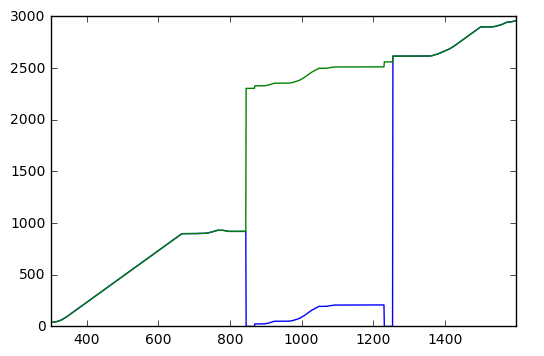

In [127]:
with_shortcut.apply(x_pos,axis=1)[:1300].plot()
#with_shortcut.apply(lambda ram:ram[0x072C]*10,axis=1)[:1300].plot()
#with_shortcut.apply(shortcut_bonus,axis=1)[100:1400].plot()
with_shortcut.apply(combined,axis=1)[:1300].plot()

### Additional stuffs

0x00CE 	Player y pos on screen (multiply with value at 0x00B5 to get level y pos)   
0x0750 	Area Offset- Check this page for full list of value results.   
0x071A 	Current screen (in level)  not there 
0x071B 	Next screen (in level) 
0x072C 	Current level layout index 
0x0057 	Player horizontal speed 

In [ ]:
# does not change quickly enough
with_shortcut.apply(lambda ram:ram[0x0750],axis=1)[700:1400].plot()

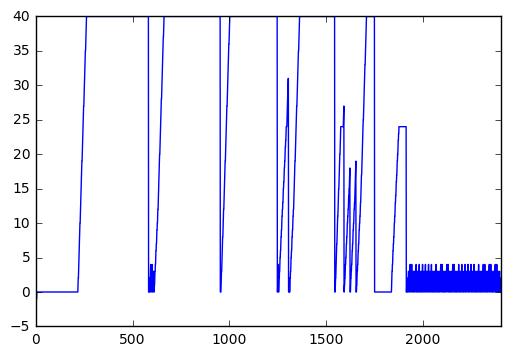

In [12]:
#speed
without_shortcut.apply(heuristics.x_speed,axis=1).plot()

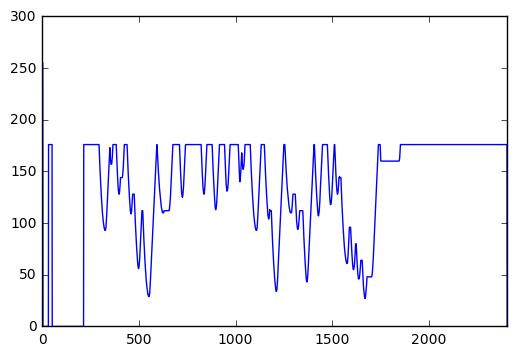

In [13]:
without_shortcut.apply(lambda ram: ram[0x00CE],axis=1).plot()